In [1]:
import PIL

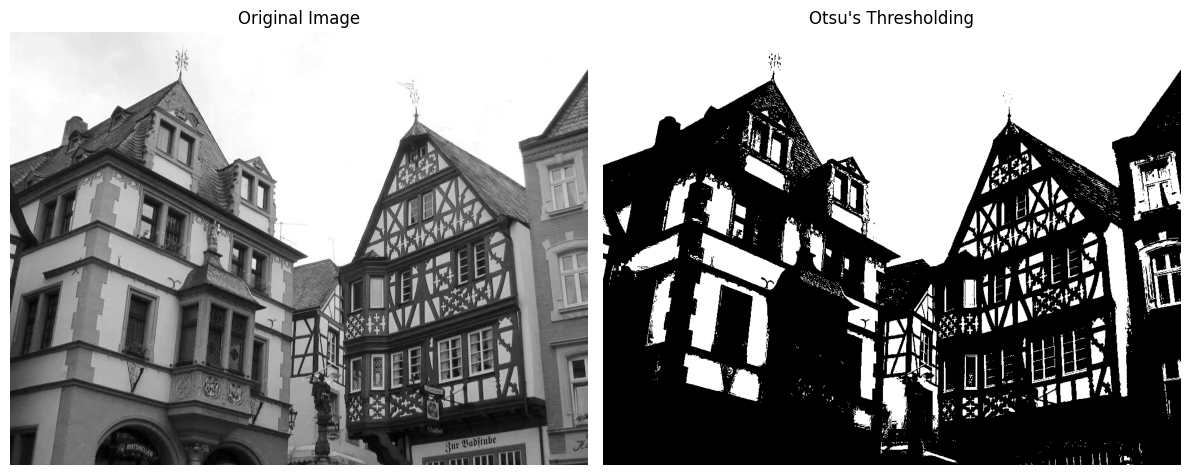

In [12]:
path = r'C:\Users\Hege\Documents\GitHub\PoissonNet_clean\otsu\Image_processing_pre_otsus_algorithm.jpg'
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Thresholded Image
ax[1].imshow(thresh, cmap='gray')
ax[1].set_title("Otsu's Thresholding")
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [14]:
_

152.0

In [15]:
import torch
def otsu_thresholding(image):
    # Ensure image is a tensor
    image = torch.as_tensor(image)

    rank = len(image.shape)
    if rank != 2 and rank != 3:
        raise ValueError("Image should be either 2 or 3-dimensional.")

    if image.dtype != torch.int32:
        image = image.int()

    r, c = image.shape[:2]
    hist = torch.bincount(image.view(-1), minlength=256)
    
    if len(hist) < 256:
        hist = torch.cat([hist, torch.zeros(256-len(hist), dtype=torch.int32)], 0)

    current_max, threshold = 0, 0
    total = r * c

    spre = torch.zeros(256, dtype=torch.int32)
    sw = torch.zeros(256, dtype=torch.int32)
    spre[0] = hist[0]

    for i in range(1,256):
        spre[i] = spre[i-1] + hist[i]
        sw[i] = sw[i-1] + (i * hist[i])

    for i in range(256):
        if total - spre[i] == 0:
            break

        meanB = 0 if spre[i]==0 else sw[i]/spre[i]
        meanF = (sw[255] - sw[i])/(total - spre[i])
        varBetween = (total - spre[i]) * spre[i] * ((meanB-meanF)**2)

        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    final = torch.where(image>threshold, torch.tensor(255), torch.tensor(0))
    print(threshold)
    return final

# Test the function with a sample image
image = torch.from_numpy(img)
thresholded_image = otsu_thresholding(image)

240


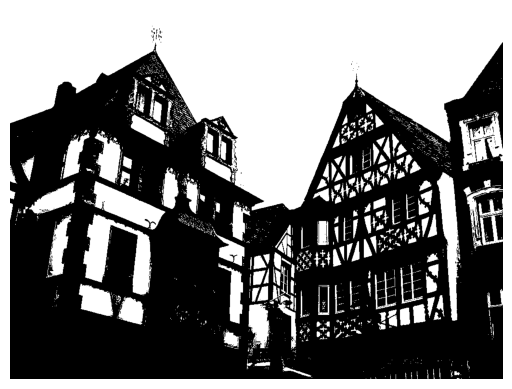

In [16]:
plt.imshow(thresholded_image.numpy(), cmap='gray')
plt.axis('off')
plt.show()